In [2]:
###### IMPORTING DEPENDENCIES
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.metrics import accuracy_score
import pandas as pd
import torch
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
######
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression  # pip install scikit-learn
import pickle
import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
####
import nltk
import requests
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = 999
set_config(display='diagram')
#####
import streamlit as st
from PIL import Image
import numpy as np
import pickle
import time
import json
#import torch
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords
import nltk
import ssl
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#reading in rthe training set rel 3 documents
df = pd.read_excel('/Users/akamdem/Downloads/asap_aes2/training_set_rel3.xlsx')
df = df[(df.essay_set == 3) | (df.essay_set ==4)]
data = pd.read_excel('/Users/akamdem/Downloads/asap_aes2/training_set_rel3.xlsx')
data = data[(data.essay_set==3) | (data.essay_set == 4)]
df.head(1)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
3583,5978,3,The features of the setting affect the cyclist...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.essay_set.value_counts()

essay_set
4    1772
3    1726
Name: count, dtype: int64

In [5]:
#dropping rows with excessive null values
threshold = 10
df.dropna(thresh=len(df) - threshold, axis=1, inplace=True)
df.fillna(0, inplace=True)

threshold = 10
data.dropna(thresh=len(df) - threshold, axis=1, inplace=True)
data.fillna(0, inplace=True)

In [6]:
#downloading stop words to be extracted later
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

2023-12-02 13:50:35.394 Python[51773:22950171] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

True

In [8]:
# Convert text to lowercase
df.essay = df.essay.str.lower()
df.head(1)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
3583,5978,3,the features of the setting affect the cyclist...,1.0,1.0,1.0


In [9]:
data.head(1)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
3583,5978,3,The features of the setting affect the cyclist...,1.0,1.0,1.0


In [10]:
# Remove punctuation
df.essay = df.essay.str.translate(str.maketrans('', '', string.punctuation))
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
3583,5978,3,the features of the setting affect the cyclist...,1.0,1.0,1.0
3584,5979,3,the features of the setting affected the cycli...,2.0,2.0,2.0
3585,5980,3,everyone travels to unfamiliar places sometime...,1.0,1.0,1.0
3586,5981,3,i believe the features of the cyclist affected...,1.0,1.0,1.0
3587,5982,3,the setting effects the cyclist because of the...,2.0,2.0,2.0


In [11]:
#tokenizing words
tokenized_words = df.essay.apply(word_tokenize)
tokenized_sentences = df.essay.apply(sent_tokenize)

tokenized_words2 = data.essay.apply(word_tokenize)
tokenized_sentences2 = data.essay.apply(sent_tokenize)

In [12]:
tokenized_sentences2.shape

(3498,)

In [13]:
tokenized_words

3583    [the, features, of, the, setting, affect, the,...
3584    [the, features, of, the, setting, affected, th...
3585    [everyone, travels, to, unfamiliar, places, so...
3586    [i, believe, the, features, of, the, cyclist, ...
3587    [the, setting, effects, the, cyclist, because,...
                              ...                        
7076    [to, me, it, seam, like, the, whoever, was, sa...
7077    [the, author, concludes, the, story, with, thi...
7078    [the, author, uses, this, conclusion, for, a, ...
7079    [the, author, concludes, the, story, with, thi...
7080    [there, was, a, specific, reason, as, to, why,...
Name: essay, Length: 3498, dtype: object

In [14]:
# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df.essay = df.essay.apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akamdem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#sampling the processed data frame (lowercases, stop words removed, punctuations removed etc.)
df.sample(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
5348,8902,4,reason author concludes story paragraph shows ...,3.0,2.0,3.0
4825,7223,3,features setting affected cyclist,1.0,1.0,1.0


In [16]:
#sampling the un-processed data frame
data.sample(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
3965,6361,3,Durring the cyclist @CAPS1 he was affected by ...,2.0,2.0,2.0
3839,6235,3,"In the story ""Do Not Exceed Posted Speed Limit...",1.0,1.0,1.0


In [17]:
#preparing inputs for modeling
#tokenized_words = [word for word in tokenized_words if word not in stop_words]
#tokenized_sentences = [word for word in tokenized_sentences if word not in stop_words]
text_input = df.essay#["This is a positive review.", "This is a negative review.", "Neutral review."]
scores = df.domain1_score #[1, 0, 1]  # Example scores (1 for positive, 0 for negative)

tokenized_words = tokenized_words#["This is a positive review.", "This is a negative review.", "Neutral review."]
scores3 = df.domain1_score #[1, 0, 1]  # Example scores (1 for positive, 0 for negative)

tokenized_sentences2 = tokenized_sentences2#["This is a positive review.", "This is a negative review.", "Neutral review."]
scores2 = data.domain1_score #[1, 0, 1]  # Example scores (1 for positive, 0 for negative)

In [18]:
text_input.shape

(3498,)

In [19]:
#unfurling the list-like values and spreading their content to multiple rows
tokenized_sent = tokenized_sentences.explode()
tokenized_sent
tokenized_word = tokenized_words.explode()
tokenized_word
tokenized_sent2 = tokenized_sentences2.explode()
tokenized_sent2
tokenized_word2 = tokenized_words2.explode()
tokenized_sent2

3583    The features of the setting affect the cyclist...
3583    The features of the setting that affect the cy...
3583    This was a problem because he needed water for...
3584    The features of the setting affected the cycli...
3584          He was in the desert, which is dry and hot.
                              ...                        
7080    There was a specific reason as to why the auth...
7080    The author wanted to show how the plant gave S...
7080    Saeng previously was upset and tearing the pla...
7080    But It seemed that she realized how the plant ...
7080    So she now was determined to battle the odds a...
Name: essay, Length: 18236, dtype: object

In [84]:
# Step 1: Text Vectorization of processed data with tfidf specifically 
tfidf_vectorizer = TfidfVectorizer(max_features=10000,ngram_range=(2,2))  # You can adjust max_features
X = tfidf_vectorizer.fit_transform(df.essay)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, scores, test_size=0.2, random_state=42)

In [85]:
# Step 1: Text Vectorization of un-processed data with tfidf specifically 
tfidf_vectorizer = TfidfVectorizer(max_features=10000,ngram_range=(2,2))  # You can adjust max_features
X2 = tfidf_vectorizer.fit_transform(data.essay)
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, scores2, test_size=0.2, random_state=42)

In [86]:
#fitting model on processed data
model = MultinomialNB(alpha=.001)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.001)

In [87]:
#fitting model on un-processed data
model2 = MultinomialNB(alpha=5)
model2.fit(X_train2, y_train2)

MultinomialNB(alpha=5)

In [88]:
#creating predictions for processed and unprocessed models/data
predicted_scores = model.predict(X_test)
predicted_scores2 = model2.predict(X_test2)

## Printing naive bayes scores for un-processed data

In [89]:
accuracy2 = metrics.accuracy_score(y_test2, predicted_scores2)
precision2 = metrics.precision_score(y_test2, predicted_scores2, average='weighted')
recall2 = metrics.recall_score(y_test2, predicted_scores2, average='weighted')
f1_score2 = metrics.f1_score(y_test2, predicted_scores2, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'F1-Score: {f1_score2}')

Accuracy: 0.4514285714285714
Precision: 0.3361320346320346
Recall: 0.4514285714285714
F1-Score: 0.3679972367271471


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Printing naive bayes confusion matrix for unprocessed data 

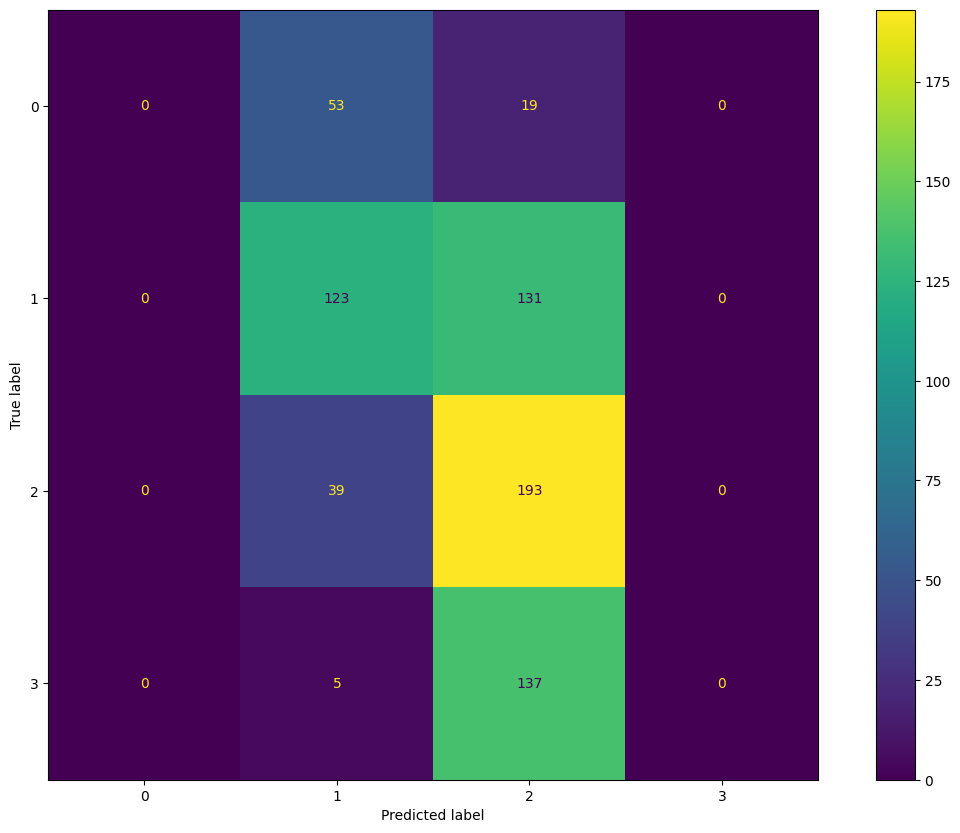

In [91]:
fig, ax = plt.subplots(figsize=(15, 10))
cm = confusion_matrix(y_test, predicted_scores2)
# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired
plt.show()

## printing naive bayes scores for processed data

In [92]:
accuracy = metrics.accuracy_score(y_test, predicted_scores)
precision = metrics.precision_score(y_test, predicted_scores, average='weighted')
recall = metrics.recall_score(y_test, predicted_scores, average='weighted')
f1_score = metrics.f1_score(y_test, predicted_scores, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')

Accuracy: 0.4142857142857143
Precision: 0.43489727108840687
Recall: 0.4142857142857143
F1-Score: 0.4003094797636942


## printing naive bayes confusion matrix for processed data 

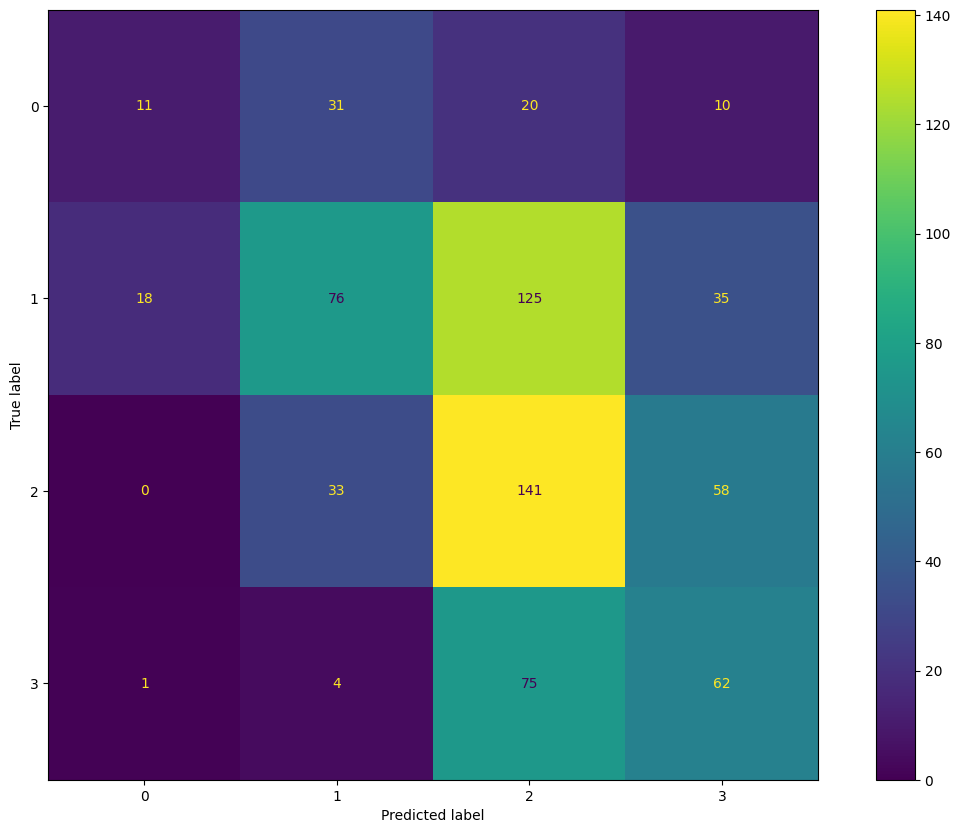

In [93]:
fig, ax = plt.subplots(figsize=(15, 10))
cm = confusion_matrix(y_test, predicted_scores)
# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired
plt.show()

# Logistic Regression Model

In [94]:
#initiating model with processed data
log = LogisticRegression()
# Fit the model on the training data
log.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = log.predict(X_test)
# Evaluate the model's accuracy
#initiating model with un - processed data
log2 = LogisticRegression()
# Fit the model on the training data
log2.fit(X_train2, y_train2)
# Make predictions on the testing data
y_pred2 = log2.predict(X_test)
# Evaluate the model's accuracy

## Printing scores and confusion matrix for logistic classifier with processed data

In [95]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')

Accuracy: 0.48142857142857143
Precision: 0.49724282822440713
Recall: 0.48142857142857143
F1-Score: 0.4411096947911973


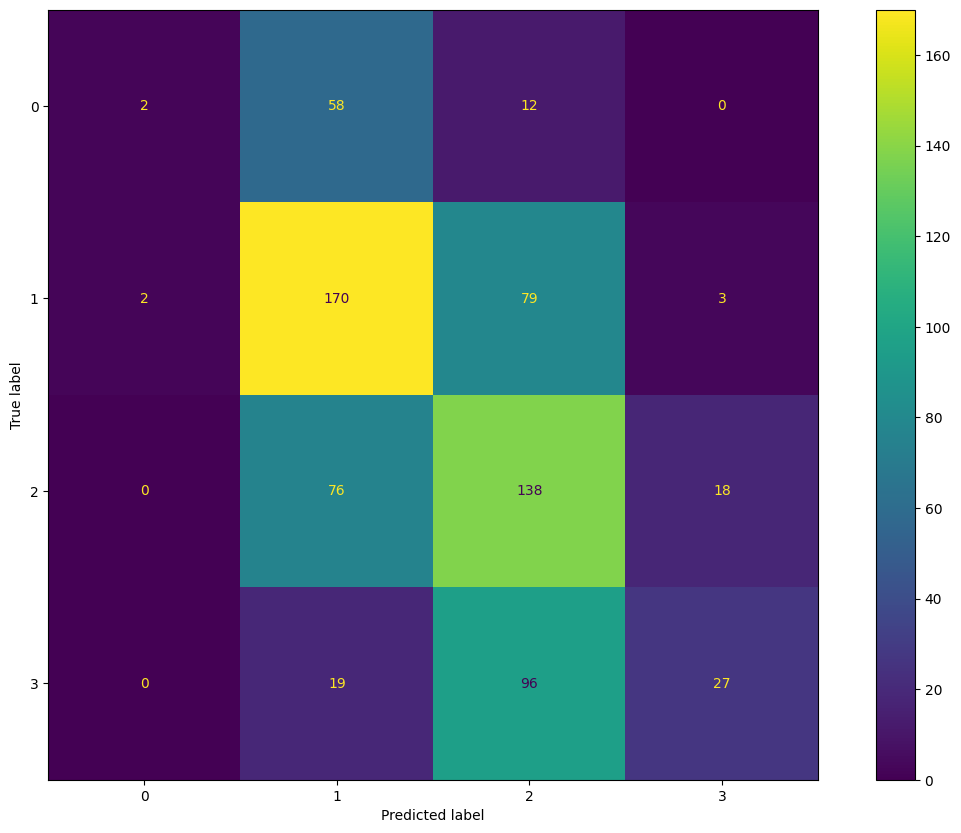

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired

plt.show()

## Printing scores and confusion matrix for logistic classifier with un-processed data

In [99]:
accuracy2 = metrics.accuracy_score(y_test, y_pred2)
precision2 = metrics.precision_score(y_test, y_pred2, average='weighted')
recall2 = metrics.recall_score(y_test, y_pred2, average='weighted')
f1_score2 = metrics.f1_score(y_test, y_pred2, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'F1-Score: {f1_score2}')

Accuracy: 0.3628571428571429
Precision: 0.2559000825763832
Recall: 0.3628571428571429
F1-Score: 0.20083781334944129


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


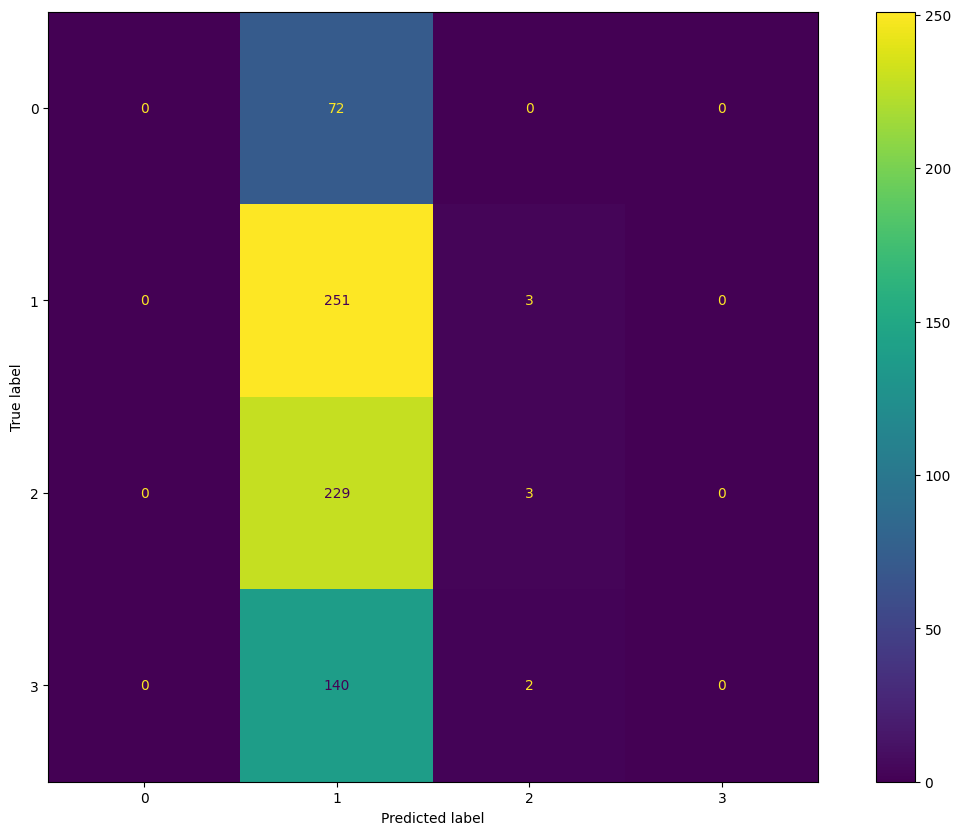

In [100]:
fig, ax = plt.subplots(figsize=(15, 10))
cm = confusion_matrix(y_test, y_pred2)
# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired
plt.show()

In [101]:
# Create and train a Random Forest classifier with processed data
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)
# Create and train a Random Forest classifier with un - processed data
rfc2 = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc2.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [102]:
# making predictions with processed and unprocessed variables
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc2 = rfc2.predict(X_test)

## printing Random Forests scores and confusion matrix for processed data

In [103]:
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
precision_rfc = metrics.precision_score(y_test, y_pred_rfc, average='weighted')
recall_rfc = metrics.recall_score(y_test, y_pred_rfc, average='weighted')
f1_score_rfc = metrics.f1_score(y_test, y_pred_rfc, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy_rfc}')
print(f'Precision: {precision_rfc}')
print(f'Recall: {recall_rfc}')
print(f'F1-Score: {f1_score_rfc}')

Accuracy: 0.5485714285714286
Precision: 0.5930829176320429
Recall: 0.5485714285714286
F1-Score: 0.5308089491266526


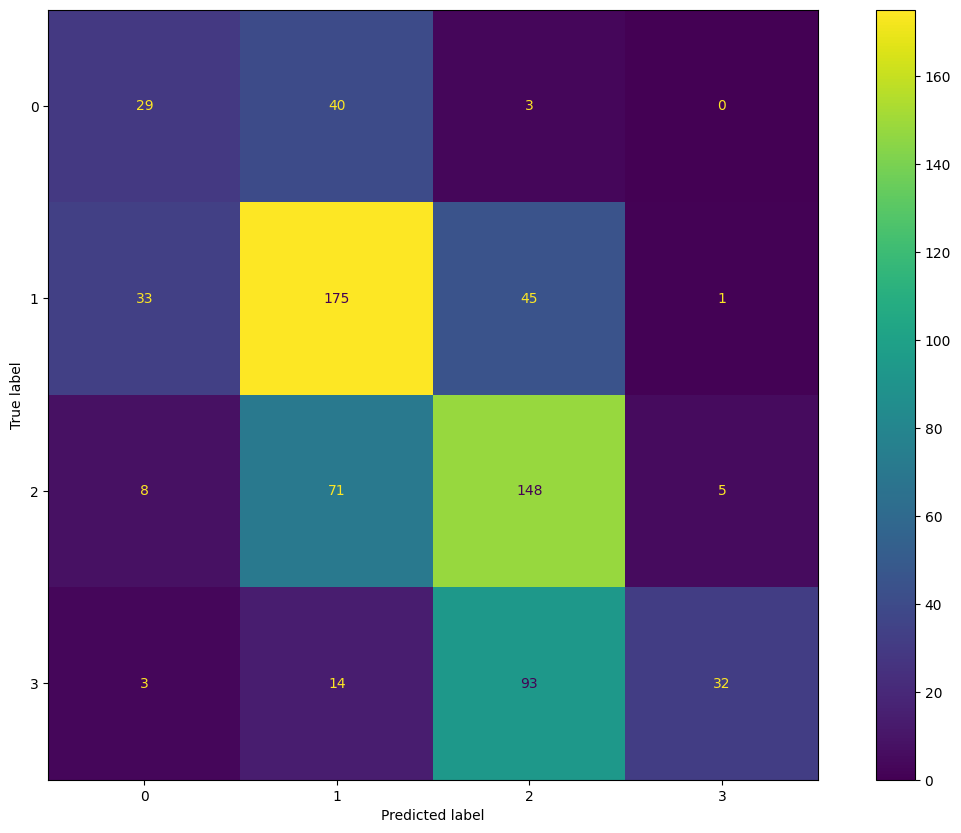

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))
cm = confusion_matrix(y_test, y_pred_rfc)
# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired
plt.show()

## printing Random Forests scores and confusion matrix for un-processed data

In [105]:
accuracy_rfc2 = metrics.accuracy_score(y_test, y_pred_rfc2)
precision_rfc2 = metrics.precision_score(y_test, y_pred_rfc2, average='weighted')
recall_rfc2 = metrics.recall_score(y_test, y_pred_rfc2, average='weighted')
f1_score_rfc2 = metrics.f1_score(y_test, y_pred_rfc2, average='weighted')
# Print the evaluation scores
print(f'Accuracy: {accuracy_rfc2}')
print(f'Precision: {precision_rfc2}')
print(f'Recall: {recall_rfc2}')
print(f'F1-Score: {f1_score_rfc2}')

Accuracy: 0.3628571428571429
Precision: 0.13166530612244898
Recall: 0.3628571428571429
F1-Score: 0.19321952680443247


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


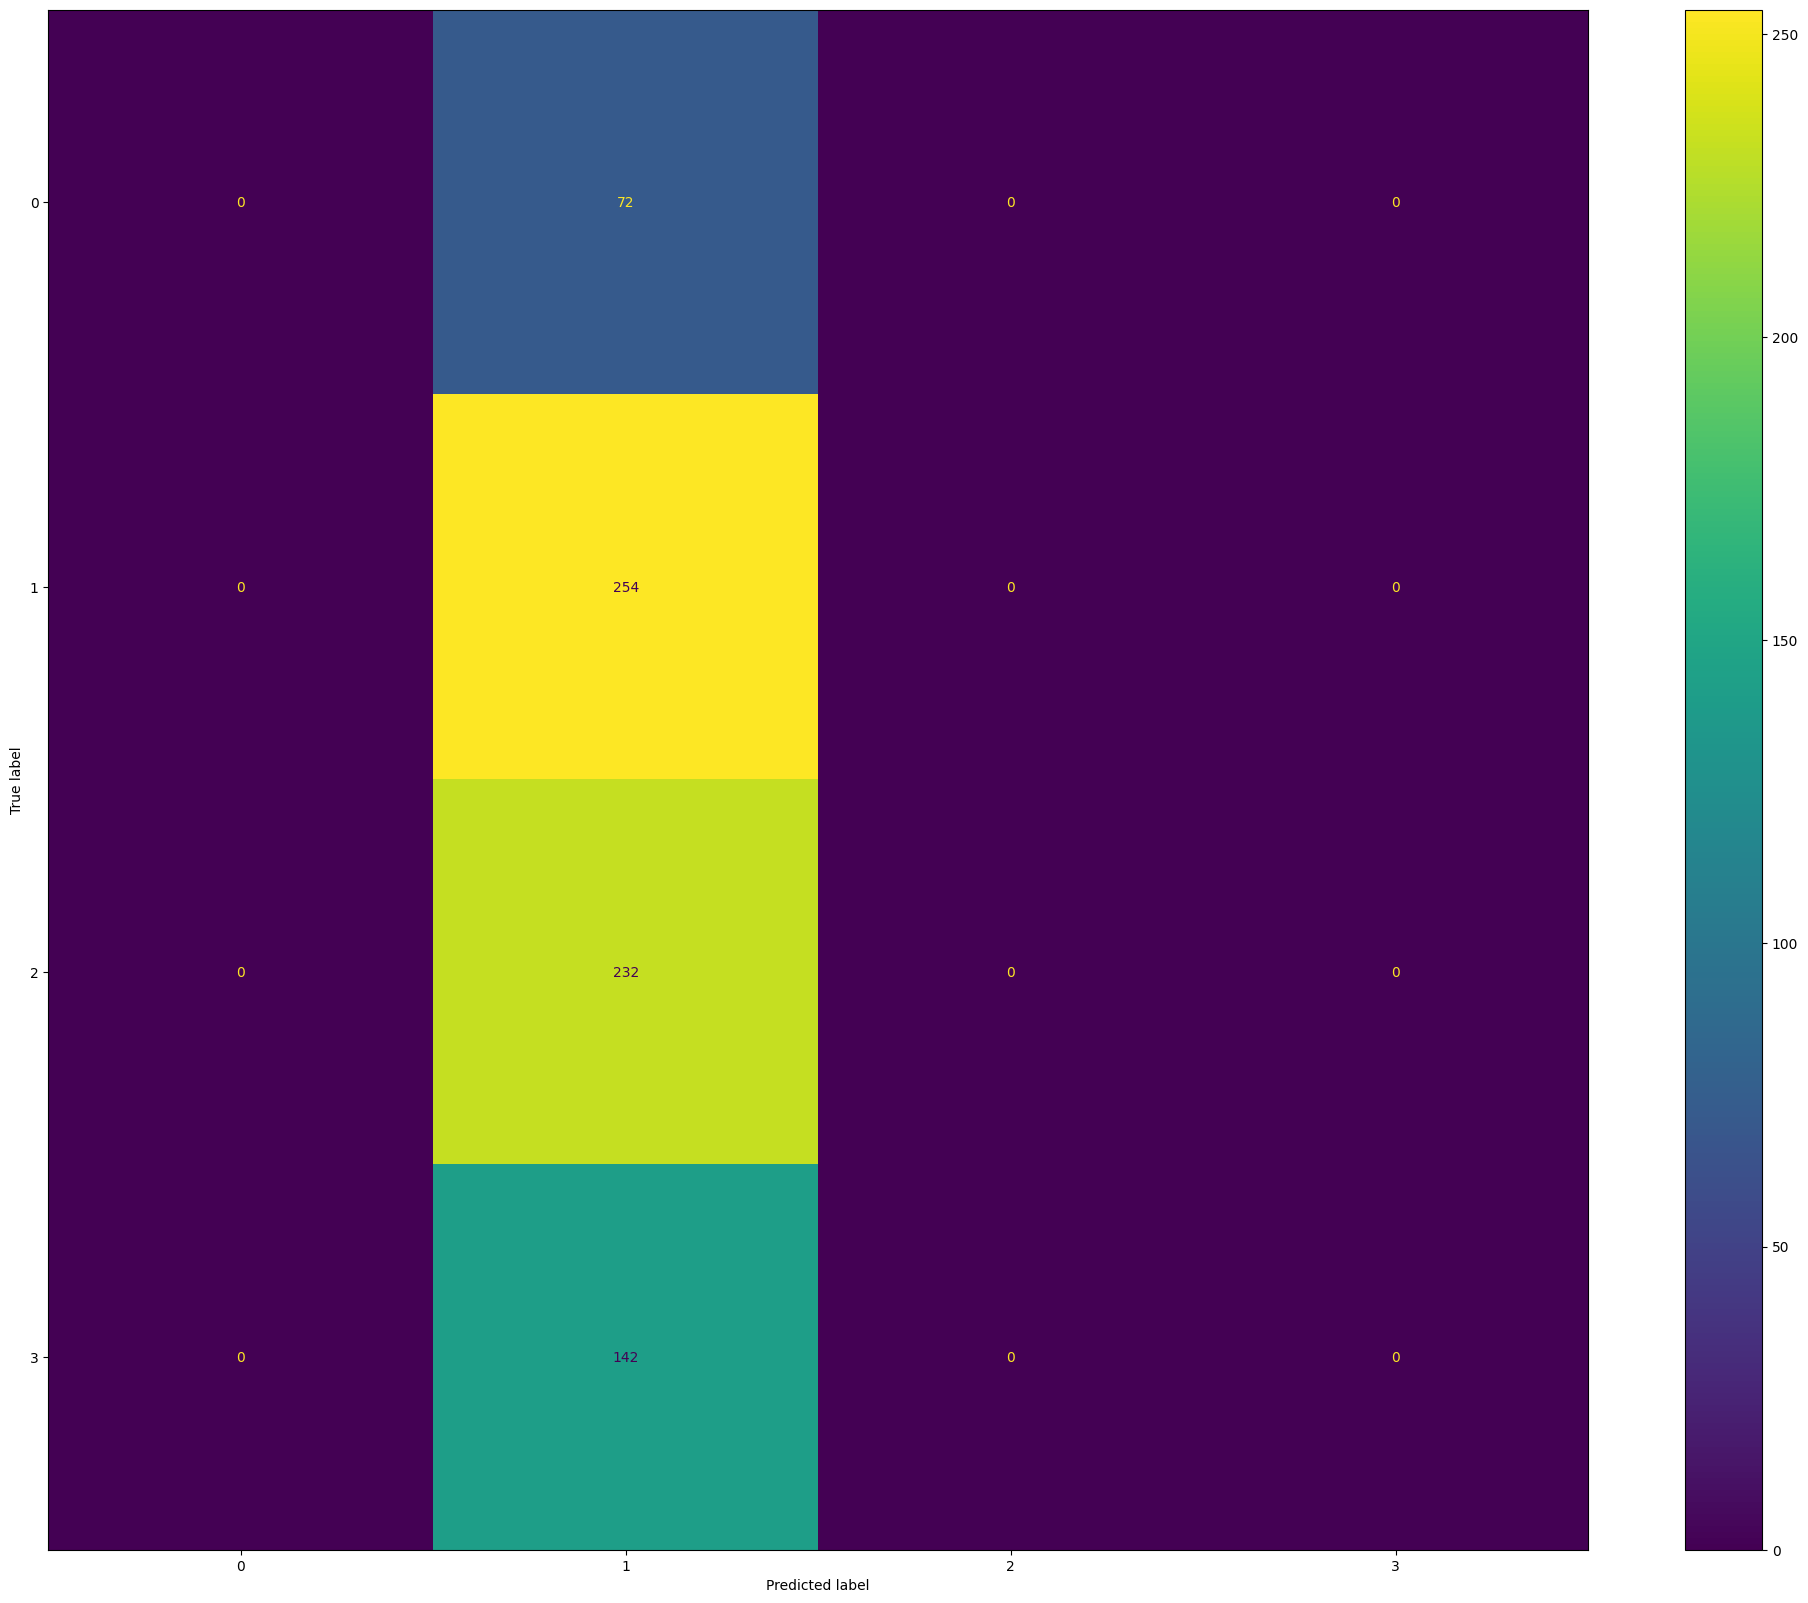

In [106]:
fig, ax = plt.subplots(figsize=(25, 20))
cm = confusion_matrix(y_test, y_pred_rfc2)
# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired
plt.show()

## KNN Model

In [110]:
#initiating model with processed data
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the model on the training data
knn.fit(X_train, y_train)
# Make predictions on the testing data
pred = knn.predict(X_test)
# Evaluate the model's accuracy
#initiating model with un - processed data
knn2 = KNeighborsClassifier(n_neighbors=1)
# Fit the model on the training data
knn2.fit(X_train2, y_train2)
# Make predictions on the testing data
pred2 = knn2.predict(X_test)
# Evaluate the model's accuracy

## KNN scores and confusion matrix for processed data

In [111]:
accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred, average='weighted')
recall = metrics.recall_score(y_test, pred, average='weighted')
f1_score = metrics.f1_score(y_test, pred, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')

Accuracy: 0.10714285714285714
Precision: 0.3938482530494108
Recall: 0.10714285714285714
F1-Score: 0.03289626064044617


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


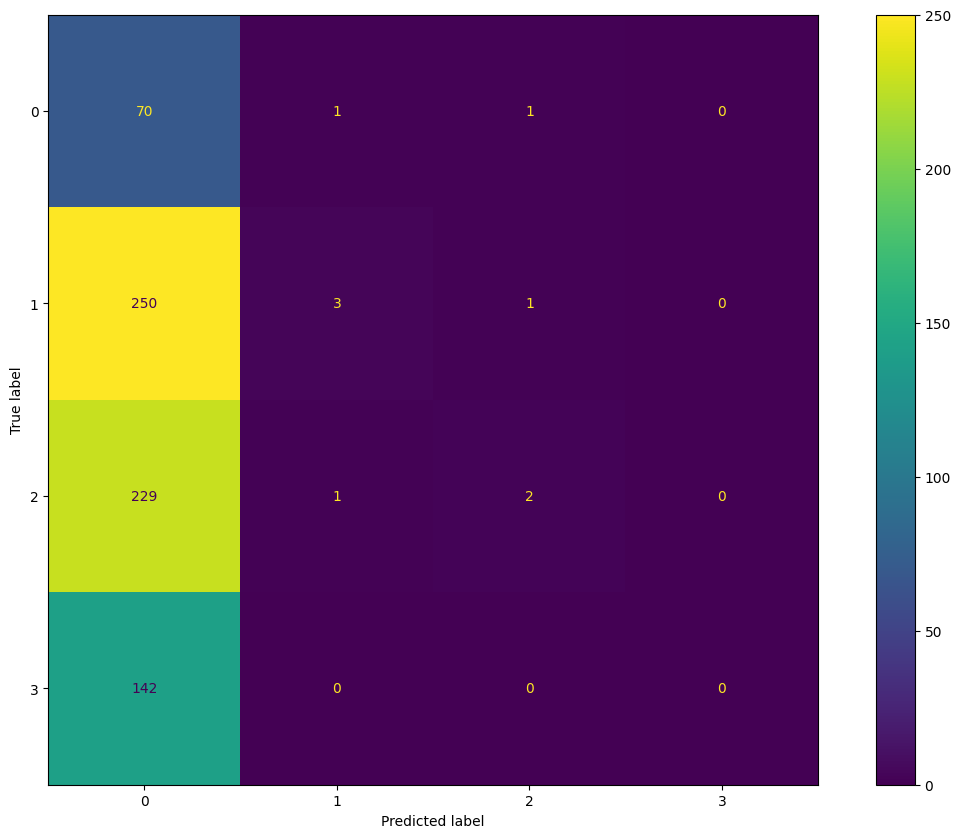

In [112]:
fig, ax = plt.subplots(figsize=(15, 10))
cm = confusion_matrix(y_test, pred)
# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired
plt.show()

## KNN scores and matrix for unprocessed data

In [113]:
accuracy = metrics.accuracy_score(y_test, pred2)
precision = metrics.precision_score(y_test, pred2, average='weighted')
recall = metrics.recall_score(y_test, pred2, average='weighted')
f1_score = metrics.f1_score(y_test, pred2, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')

Accuracy: 0.3628571428571429
Precision: 0.13166530612244898
Recall: 0.3628571428571429
F1-Score: 0.19321952680443247


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


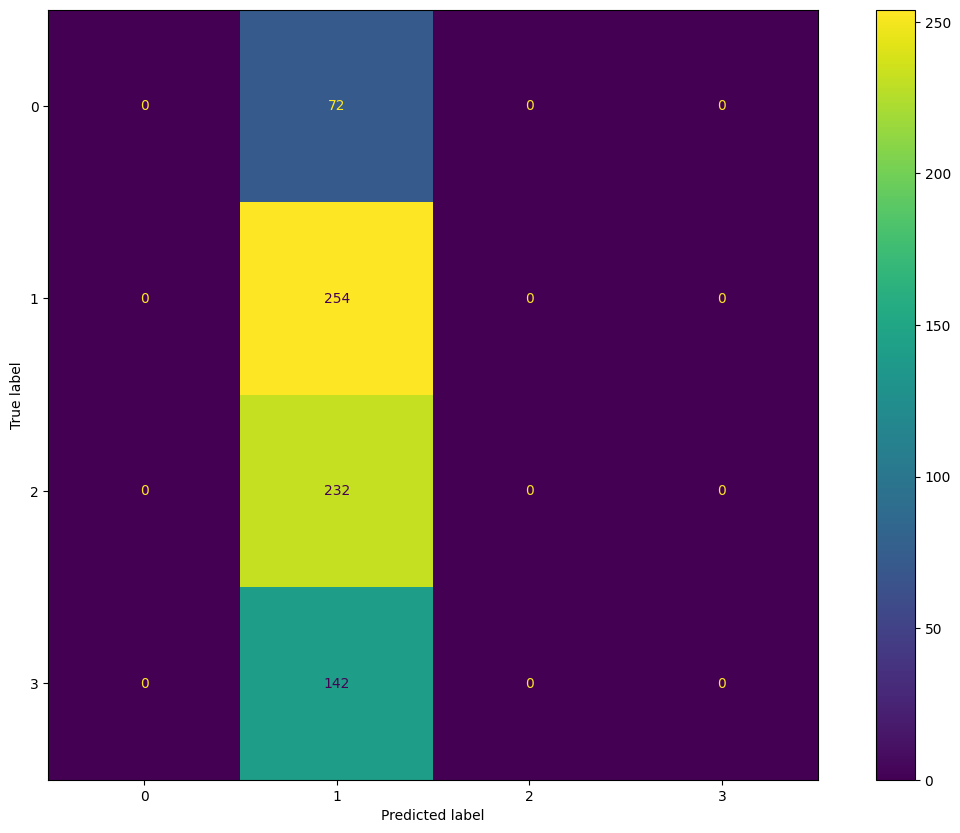

In [114]:
fig, ax = plt.subplots(figsize=(15, 10))
cm = confusion_matrix(y_test, pred2)
# Create ConfusionMatrixDisplay with the confusion matrix and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax)  # You can also specify a colormap if desired
plt.show()

## ROC CURVE AND AUC FOR NAIVE BAYES MODEL

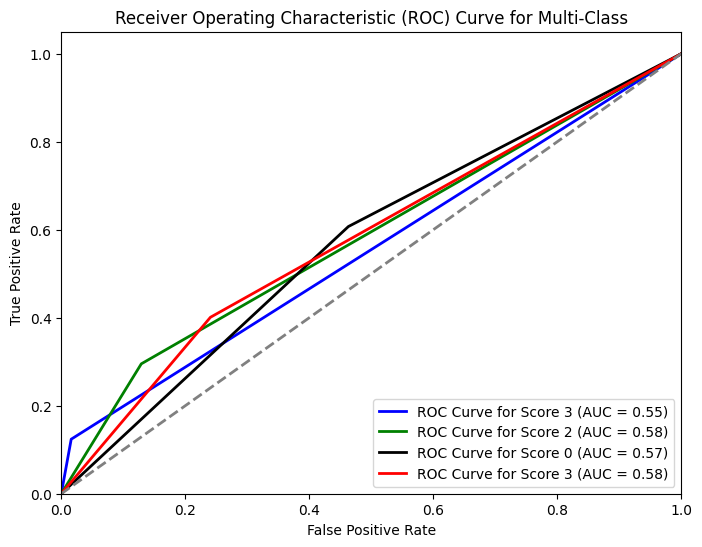

In [128]:
X_sparse = sparse.csr_matrix(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, scores, test_size=0.3, random_state=42)
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
dt_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
log_classifier = LogisticRegression()
# Fit the classifiers on the training data
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
log_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train.toarray(), y_train)  # Convert X_train to dense array here
# Calculate ROC curve and AUC for each class for each classifier
n_classes = len(np.unique(scores))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_prob_knn = knn_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_dt = dt_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_nb = nb_classifier.predict_proba(X_test.toarray())[:, i]
    y_prob_log = log_classifier.predict_proba(X_test.toarray())[:, i]

    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob_nb)
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curves for each class with labels
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'black', 'red']  # Add a color for each class
# Labels for each model
labels = ['ROC Curve for Score 3', 'ROC Curve for Score 2', 'ROC Curve for Score 0', 'ROC Curve for Score 3']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='{} (AUC = {:.2f})'.format(labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

# ROC CURVE & AUC FOR KNN MODEL

In [122]:
for i in range(n_classes):
    print(i)

0
1
2
3


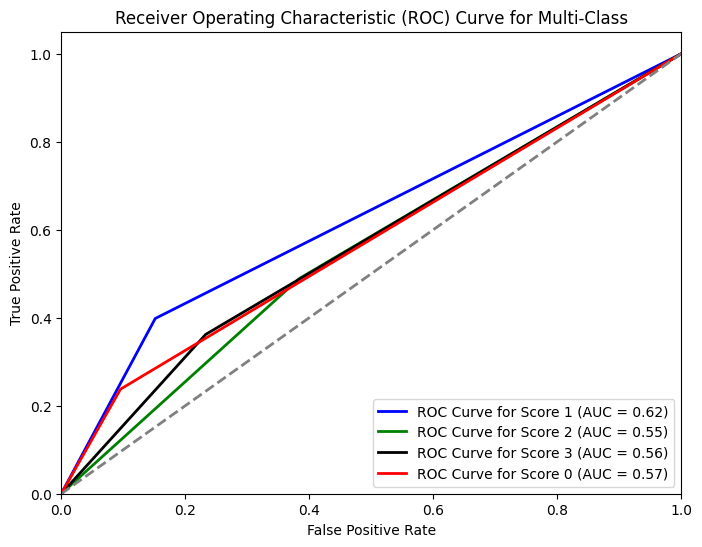

In [123]:
X_sparse = sparse.csr_matrix(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, scores, test_size=0.3, random_state=42)
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
dt_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
log_classifier = LogisticRegression()
# Fit the classifiers on the training data
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
log_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train.toarray(), y_train)  # Convert X_train to dense array here
# Calculate ROC curve and AUC for each class for each classifier
n_classes = len(np.unique(scores))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_prob_knn = knn_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_dt = dt_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_nb = nb_classifier.predict_proba(X_test.toarray())[:, i]
    y_prob_log = log_classifier.predict_proba(X_test.toarray())[:, i]

    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob_knn)
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curves for each class with labels
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'black', 'red']  # Add a color for each class
# Labels for each model
labels = ['ROC Curve for Score 1', 'ROC Curve for Score 2', 'ROC Curve for Score 3', 'ROC Curve for Score 0']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='{} (AUC = {:.2f})'.format(labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

## ROC CURVE AND AUC FOR LOGISTIC CLASSIFIER

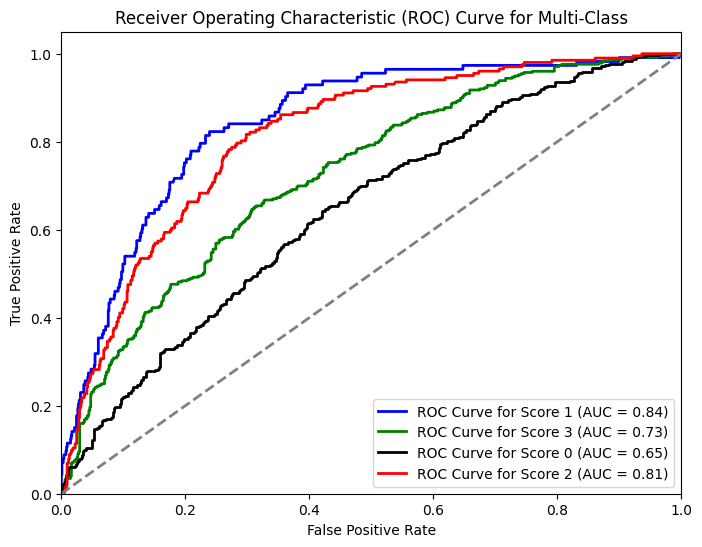

In [127]:
X_sparse = sparse.csr_matrix(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, scores, test_size=0.3, random_state=42)
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
dt_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
log_classifier = LogisticRegression()
# Fit the classifiers on the training data
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
log_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train.toarray(), y_train)  # Convert X_train to dense array here
# Calculate ROC curve and AUC for each class for each classifier
n_classes = len(np.unique(scores))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_prob_knn = knn_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_dt = dt_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_nb = nb_classifier.predict_proba(X_test.toarray())[:, i]
    y_prob_log = log_classifier.predict_proba(X_test.toarray())[:, i]

    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob_log)
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curves for each class with labels
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'black', 'red']  # Add a color for each class
# Labels for each model
labels = ['ROC Curve for Score 1', 'ROC Curve for Score 3', 'ROC Curve for Score 0', 'ROC Curve for Score 2']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='{} (AUC = {:.2f})'.format(labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

## ROC CURVE & AUC FOR RANDOM FOREST CLASSIFIER

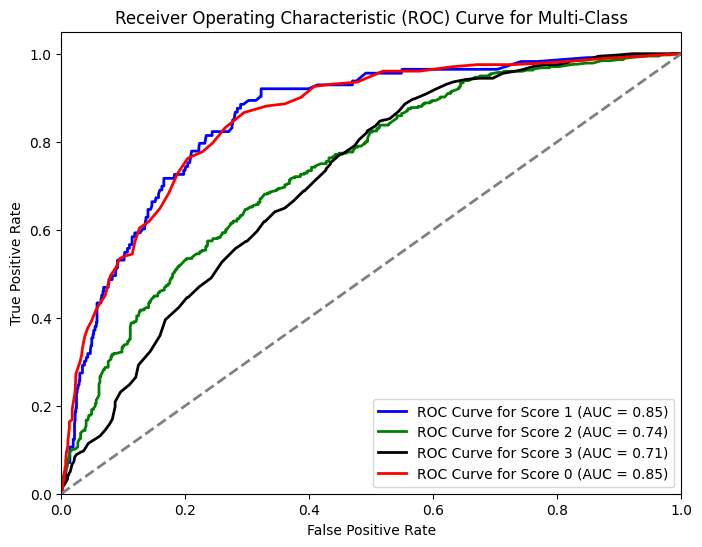

In [125]:
X_sparse = sparse.csr_matrix(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, scores, test_size=0.3, random_state=42)
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
dt_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
log_classifier = LogisticRegression()
# Fit the classifiers on the training data
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
log_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train.toarray(), y_train)  # Convert X_train to dense array here
# Calculate ROC curve and AUC for each class for each classifier
n_classes = len(np.unique(scores))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_prob_knn = knn_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_dt = dt_classifier.predict_proba(X_test.toarray())[:, i]  # Convert X_test to dense array here
    y_prob_nb = nb_classifier.predict_proba(X_test.toarray())[:, i]
    y_prob_log = log_classifier.predict_proba(X_test.toarray())[:, i]

    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob_dt)
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curves for each class with labels
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'black', 'red']  # Add a color for each class
# Labels for each model
labels = ['ROC Curve for Score 1', 'ROC Curve for Score 2', 'ROC Curve for Score 3', 'ROC Curve for Score 0']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='{} (AUC = {:.2f})'.format(labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()